In [1]:
from face_detector import FaceDetector
import cv2 
from matplotlib import pyplot as plt
from face_processor import FaceProcessor
import numpy as np

In [2]:
image = cv2.imread("robot.jpg")[:,:,(2, 1, 0)]

In [3]:
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

In [4]:
image = white_balance(image)

In [5]:
detector = FaceDetector()

In [6]:
face = detector.detect(image)

In [7]:
# plt.imshow(cv2.blur(face, (30,30)))

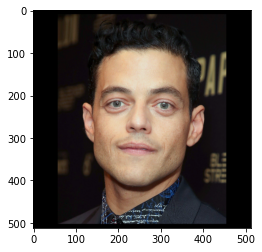

In [8]:
plt.imshow(face)

In [9]:
fprocessor = FaceProcessor("./model_weights/segmentator.pth")

In [10]:
sticker = fprocessor.image2sticker(face)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


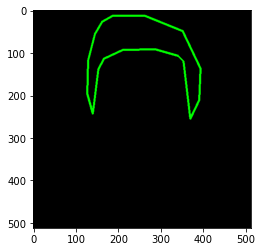

In [11]:
test_image = np.zeros((512, 512, 3))
plt.imshow(cv2.drawContours(test_image, [sticker.segments["hair"].polygon], -1, (0,255,0), 3))

In [12]:
import sys
import os
import lottie
from lottie import objects
from lottie.utils import script 
from lottie.exporters import export_tgs
from lottie.parsers.tgs import parse_tgs
from lottie.utils.animation import shake, rot_shake
from lottie import Point, Color, NVector
from lottie.utils.animation import shake, rot_shake

In [13]:
an = parse_tgs("./lottie_files/morty.json")
face = an.find("face")
face.shapes = []

sticker_group = sticker.get_lottie()
sticker_group.transform.scale.value.x *= 0.35
sticker_group.transform.scale.value.y *= 0.35
sticker_group.transform.position.value = Point(70, 100)
face.add_shape(sticker_group)

rot_shake(sticker_group.transform.rotation, Point(-10, 10), 0, 60, 10)

In [14]:
export_tgs(an, 'hui.tgs')

In [15]:
script.script_main(an)